In [1]:
from utils import compute_gas_used
from brownie import network

# Comparation of price of MEV (lower bound) with different bots, before the pull request https://github.com/ethereum/go-ethereum/pull/21358, after the pull request and after Flashbots (current time)

In [2]:
from matplotlib import pyplot as plt
def plott(pmev):
    egu = [element['executed_acumulated_gas_used'] for element in pmev.values()]
    cgu = [element['total_acumated_gas_used'] for element in pmev.values()]
    blocks = list(pmev.keys())
    n=len(blocks)
    blocks_plot = blocks[::int(n/10)]
    egu_plot = egu[::int(n/10)]
    cgu_plot = cgu[::int(n/10)]
    plt.plot(blocks_plot,egu_plot,label  = "Efficient MEV extraction",color="green")
    plt.plot(blocks_plot,cgu_plot,label  = "Total gas used",color="orange",linestyle="--")
    plt.legend() 
    plt.xticks(rotation=70)
    plt.xlabel("Block Number")
    plt.ylabel("Gas used (Wei)")

    plt.savefig('PMEV.png',bbox_inches='tight')
    plt.show()

## Pre pull request

In [3]:
from_block = 9982387 
from_block = 10495844
to_block   = from_block + 10**4
bot = "0x000000000000006F6502B7F2bbaC8C30A3f67E9a"
pmev = compute_gas_used(bot,from_block,to_block,interval = 4)

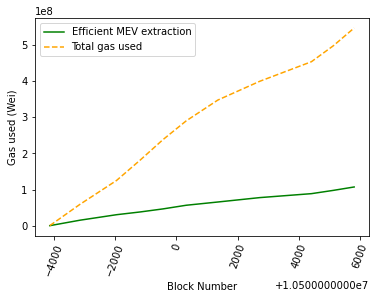

In [5]:
plott(pmev)

### Detect spam in block 10496844

In [6]:
!cd detect-spam && START_BLOCK=10496844 END_BLOCK=10496845 node index.js

1/1 Checking block 10496844
found block spammer 0x762ed657B76372F8C08C6f7E0Aa4170658C4CA35
found block spammer 0x000000000000006F6502B7F2bbaC8C30A3f67E9a
found block spammer 0xF6FB09a41fa6C18cEbC1e7C6F75A8664D69e4d48
found block spammer 0x860bd2dba9Cd475A61E6d1b45e16c365F6D78F66
found block spammer 0x4026064CAbA17596670D1655C771124C309494fB
found block spammer 0xB958a8f59AC6145851729F73c7A6968311d8B633
Block 10496844, found 187 spam txs, 234 total transactions. Spam rate 80%


Analyzed 1 blocks. Average spam rate 80%




### Price of MEV

In [7]:
last_block = list(pmev.keys())[-1]
pmev[last_block]["total_acumated_gas_used"]/pmev[last_block]["executed_acumulated_gas_used"]

5.072308017956103

## Post pull request- Pre Flashbots

## Post Flashbots

In [8]:
network.connect('mainnet')

In [9]:
block_number = network.web3.eth.block_number

In [10]:
to_block = block_number
from_block = to_block -10**4

In [11]:
mev_bot = "0x0000000000a84D1a9B0063A910315C7fFA9Cd248"
pmev = compute_gas_used(mev_bot,from_block,to_block,interval = 4)

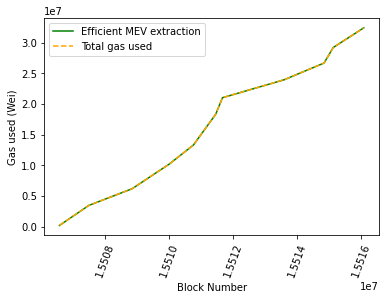

In [12]:
plott(pmev)

In [13]:
last_block = list(pmev.keys())[-1]
pmev[last_block]["total_acumated_gas_used"]/pmev[last_block]["executed_acumulated_gas_used"]

1.0

In [14]:
!cd detect-spam && START_BLOCK=15516435 END_BLOCK=15516436 node index.js

1/1 Checking block 15516435
Block 15516435, found 0 spam txs, 92 total transactions. Spam rate 0%


Analyzed 1 blocks. Average spam rate 0%


